Step 1: Data Cleaning and Ingestion

In [1]:
import pandas as pd

# Load the CSV files
file1 = pd.read_csv('csv1.csv')
file2 = pd.read_csv('csv2.csv')

# Concatenate the two files (assuming they have the same structure)
data = pd.concat([file1, file2], ignore_index=True)

# Check for missing values
print(data.isnull().sum())

# Clean up 'Legendary' column (some inconsistencies in True/False casing)
data['Legendary'] = data['Legendary'].apply(lambda x: True if str(x).lower() == 'true' else False)

# Check for duplicates and remove them
data_cleaned = data.drop_duplicates()

# Output the first few rows to see the cleaned dataset
print(data_cleaned.head())

<ipython-input-1-9cc7f710968e>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#               0
Name            0
Type 1          0
Type 2        398
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64
   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      Fals

Step 2: Fastest Ice Pokémon in Every Generation

In [2]:
# Filter for Ice type Pokémon
ice_pokemon = data_cleaned[(data_cleaned['Type 1'] == 'Ice') | (data_cleaned['Type 2'] == 'Ice')]

# Group by generation and find the fastest Pokémon
fastest_ice_pokemon = ice_pokemon.loc[ice_pokemon.groupby('Generation')['Speed'].idxmax()]

# Display the result
print(fastest_ice_pokemon[['Name', 'Generation', 'Speed']])

                  Name  Generation  Speed
133               Jynx           1     95
233            Sneasel           2    115
383  GlalieMega Glalie           3    100
498            Weavile           4    125
662          Cryogonal           5    105
743            Aurorus           6     58


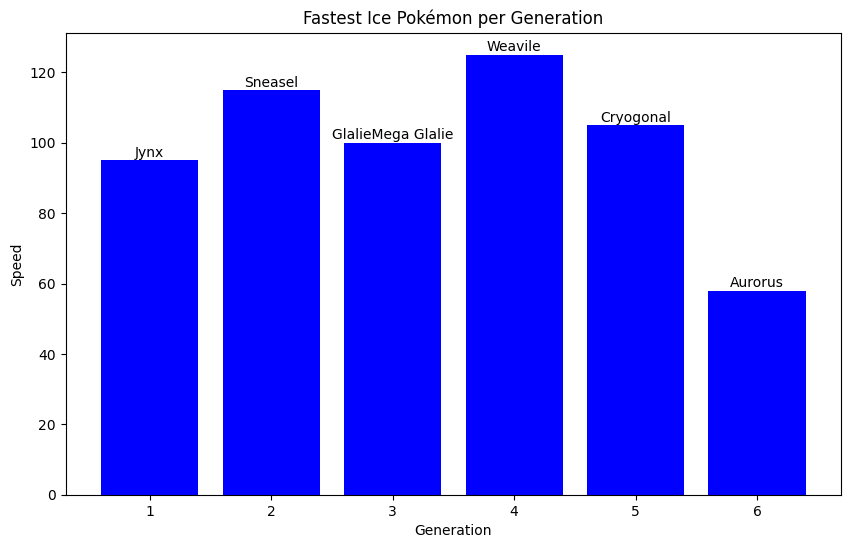

In [3]:
import matplotlib.pyplot as plt

# Plot the fastest Ice Pokémon by generation with their names
plt.figure(figsize=(10, 6))
plt.bar(fastest_ice_pokemon['Generation'], fastest_ice_pokemon['Speed'], color='blue')
plt.xlabel('Generation')
plt.ylabel('Speed')
plt.title('Fastest Ice Pokémon per Generation')

# Add Pokémon names as labels on top of the bars
for i, row in fastest_ice_pokemon.iterrows():
    plt.text(row['Generation'], row['Speed'] + 1, row['Name'], ha='center')

plt.show()

Step 3: Top 10 Pokémon per Type (by "Total")

In [4]:
# Group by Type 1 and find the top 10 Pokémon for each type by 'Total'
top_10_by_type1 = data_cleaned.groupby('Type 1').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)

# Calculate the average Attack and Defense for each type's top 10 Pokémon
avg_stats_by_type1 = top_10_by_type1.groupby('Type 1').agg(
    avg_attack=('Attack', 'mean'),
    avg_defense=('Defense', 'mean')
)

# Display the result
print(avg_stats_by_type1)

<ipython-input-4-01f08479d4a6>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_by_type1 = data_cleaned.groupby('Type 1').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)


          avg_attack  avg_defense
Type 1                           
Bug           112.10       113.10
Dark          104.60        81.70
Dragon        143.50       106.50
Electric       94.30        80.60
Fairy          73.80        76.10
Fighting      118.60        77.60
Fire          116.90        94.00
Flying         78.75        66.25
Ghost          90.00        88.60
Grass         102.70        92.40
Ground        129.90       107.30
Ice            89.70        93.90
Normal        115.60        96.20
Poison         93.80        85.30
Psychic       130.00        86.00
Rock          123.80       122.40
Steel         114.00       153.40
Water         110.00       110.40
ice            55.00        45.00
water         140.00        70.00


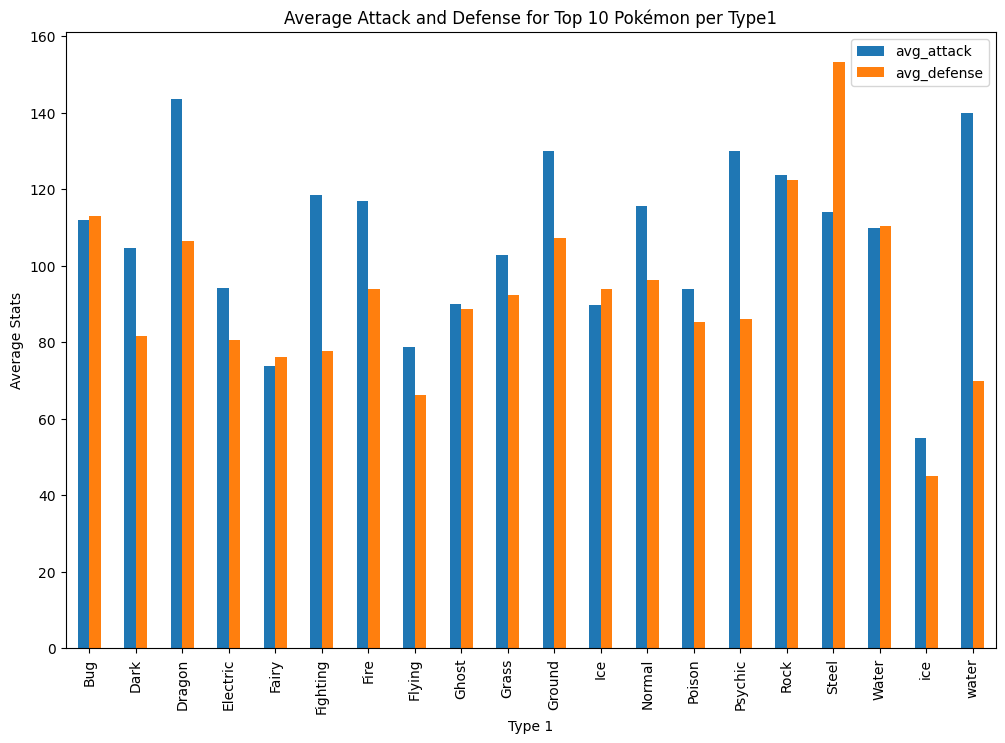

In [5]:
# Plot the average attack and defense for the top 10 Pokémon per type1
avg_stats_by_type1.plot(kind='bar', figsize=(12, 8))
plt.title('Average Attack and Defense for Top 10 Pokémon per Type1')
plt.ylabel('Average Stats')
plt.show()

In [6]:
# Group by Type 2 and find the top 10 Pokémon for each type by 'Total'
top_10_by_type2 = data_cleaned.groupby('Type 2').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)

# Calculate the average Attack and Defense for each type's top 10 Pokémon
avg_stats_by_type2 = top_10_by_type2.groupby('Type 2').agg(
    avg_attack=('Attack', 'mean'),
    avg_defense=('Defense', 'mean')
)

# Display the result
print(avg_stats_by_type2)

<ipython-input-6-b144bac2407b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_by_type2 = data_cleaned.groupby('Type 2').apply(lambda x: x.nlargest(10, 'Total')).reset_index(drop=True)


          avg_attack  avg_defense
Type 2                           
Bug        90.000000    80.000000
Dark      127.100000    94.200000
Dragon    106.500000    99.600000
Electric   72.666667    68.333333
Fairy      88.200000   107.700000
Fighting  134.500000    95.500000
Fire       88.500000    87.700000
Flying    135.400000   101.300000
Ghost      89.400000    90.700000
Grass      88.900000   101.200000
Ground    122.900000   124.600000
Ice       108.600000    96.400000
Normal     52.750000    53.750000
Poison     88.700000    75.500000
Psychic    96.200000   113.200000
Rock       87.800000   139.300000
Steel     109.100000   100.700000
Water      80.000000    98.200000


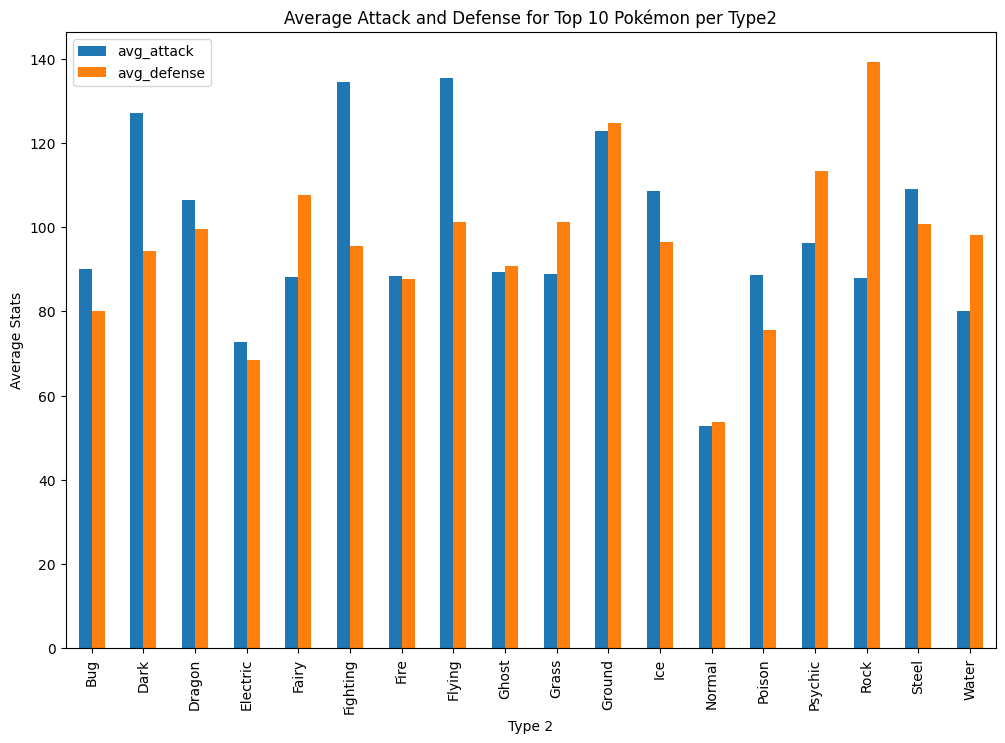

In [7]:
# Plot the average attack and defense for the top 10 Pokémon per type2
avg_stats_by_type2.plot(kind='bar', figsize=(12, 8))
plt.title('Average Attack and Defense for Top 10 Pokémon per Type2')
plt.ylabel('Average Stats')
plt.show()

Step 4: Mega Pokémon and the Strongest One

In [8]:
# Filter for Mega Pokémon (assuming they contain "Mega" in their names)
mega_pokemon = data_cleaned[data_cleaned['Name'].str.contains('Mega')]

# Find the strongest Mega Pokémon based on 'Total' stats
strongest_mega = mega_pokemon.loc[mega_pokemon['Total'].idxmax()]

# Select the top 10 Mega Pokémon based on 'Total' stats
mega_pokemon_sorted = mega_pokemon.sort_values(by='Total', ascending=False)
top_10_mega_pokemon = mega_pokemon_sorted.head(10)

top_10_mega_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
412,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
826,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
480,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
406,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
404,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
399,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
395,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False


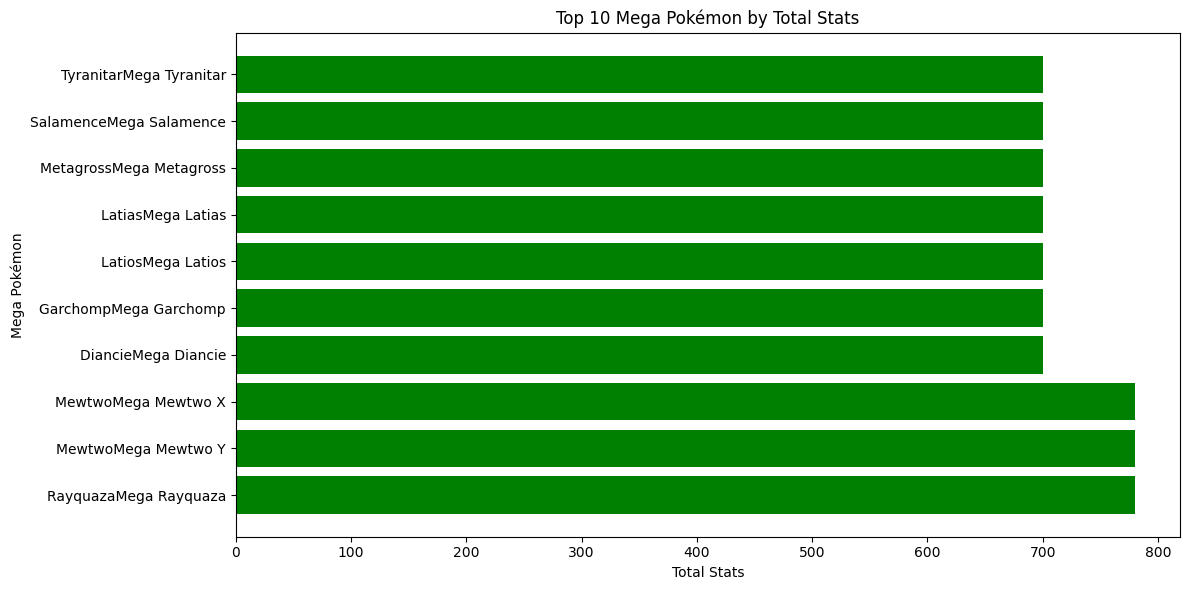

In [9]:
# Plot the Total stats of the top 10 Mega Pokémon
plt.figure(figsize=(12, 6))
plt.barh(top_10_mega_pokemon['Name'], top_10_mega_pokemon['Total'], color='green')
plt.xlabel('Total Stats')
plt.ylabel('Mega Pokémon')
plt.title('Top 10 Mega Pokémon by Total Stats')
plt.tight_layout()
plt.show()

Appendix:Legendary prediction

In [10]:
# Step 1: Data Preparation

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select features (HP, Attack, Defense, etc.) and the target (Legendary)
X = data_cleaned[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = data_cleaned['Legendary']  # Target variable (True/False for Legendary)

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection - Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Evaluation
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.93

Confusion Matrix:
[[143   2]
 [  9   7]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       145
        True       0.78      0.44      0.56        16

    accuracy                           0.93       161
   macro avg       0.86      0.71      0.76       161
weighted avg       0.92      0.93      0.92       161



AUC Score: 0.98


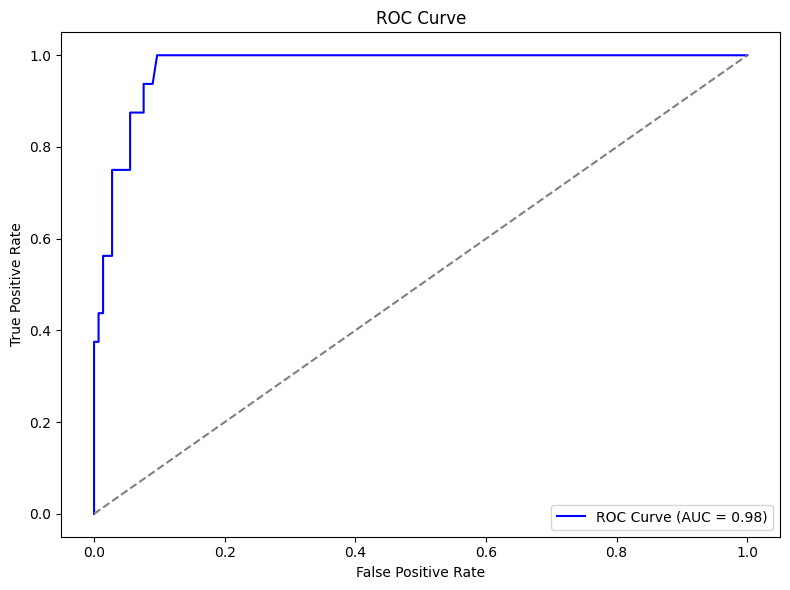

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Calculate the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (Legendary=True)

# Step 2: Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.show()

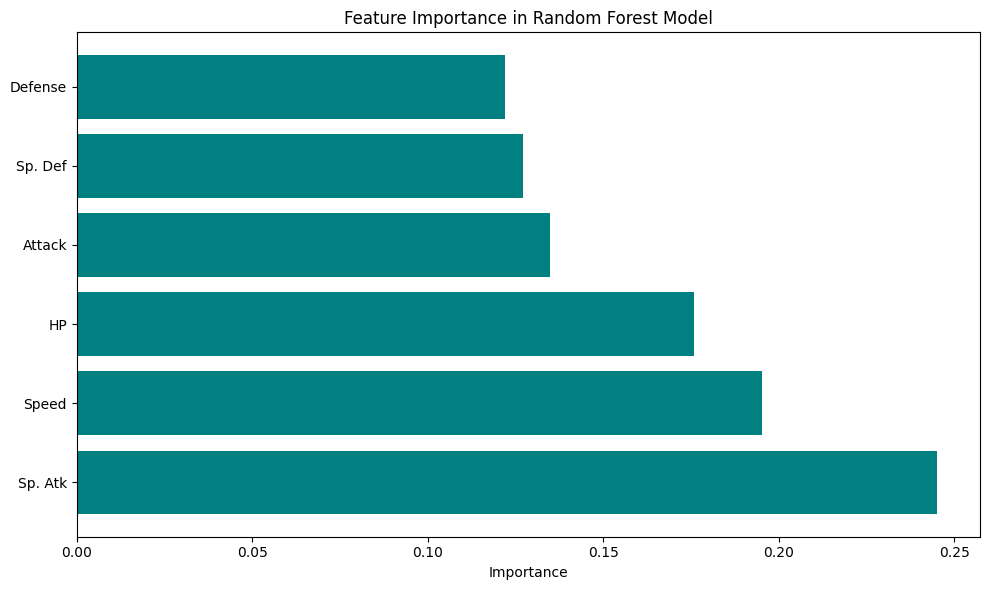

In [12]:
# Extract feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='teal')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()